In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, ELU, BatchNormalization, Dropout
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam, SGD
from stargazer.stargazer import Stargazer
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [2]:
df1 = pd.read_csv("HestonSimulation.csv", index_col = 0)

In [3]:
df2 = pd.read_csv("HestonSimulation2.csv", index_col = 0)

In [4]:
data = df1.append(df2)

/var/folders/jv/604w31hs1v964hc3p1jvb1c40000gn/T/ipykernel_36395/2262219734.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df1.append(df2)


In [5]:
Y = data["call_price"]
X = data.drop(columns=["call_price"], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [7]:
model = Sequential()
t_l = []
v_l = []

Metal device set to: Apple M1 Pro


2023-04-16 14:33:02.175201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-16 14:33:02.175222: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.add(Dense(100, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())

#newly added
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())

model.add(Dropout(0.5))
model.add(Dense(300))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU ())
model.add(Dense(1, activation='relu'))
model.compile(optimizer=Adam(learning_rate=0.001), loss="mape")

In [13]:
plot_model(model, to_file='baselineModel.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1000      
                                                                 
 batch_normalization_24 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 200)               20200     
                                                                 
 batch_normalization_25 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 elu_20 (ELU)                (None, 200)              

In [37]:
model.fit(X_train, y_train,
                    batch_size=2048, epochs=100,
                    validation_split = 0.1,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/100


/Users/macongcong/opt/anaconda3/envs/tensorflow_silicon/lib/python3.9/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 49ms/step - loss: 14.3006 - val_loss: 14.9543
Epoch 2/100
8/8 [==============================] - 0s 47ms/step - loss: 13.9650 - val_loss: 16.4260
Epoch 3/100
8/8 [==============================] - 0s 48ms/step - loss: 14.0116 - val_loss: 15.9597
Epoch 4/100
8/8 [==============================] - 0s 48ms/step - loss: 14.0868 - val_loss: 13.4658
Epoch 5/100
8/8 [==============================] - 0s 48ms/step - loss: 13.9901 - val_loss: 13.8202
Epoch 6/100
8/8 [==============================] - 0s 47ms/step - loss: 14.3556 - val_loss: 22.7773
Epoch 7/100
8/8 [==============================] - 0s 48ms/step - loss: 14.8089 - val_loss: 14.8233
Epoch 8/100
8/8 [==============================] - 0s 50ms/step - loss: 15.2651 - val_loss: 15.0709
Epoch 9/100
8/8 [==============================] - 0s 49ms/step - loss: 15.8275 - val_loss: 30.1341
Epoch 10/100
8/8 [==============================] - 0s 49ms/step - loss: 15.8924 - val_loss: 19.2119
Epoch 11/10

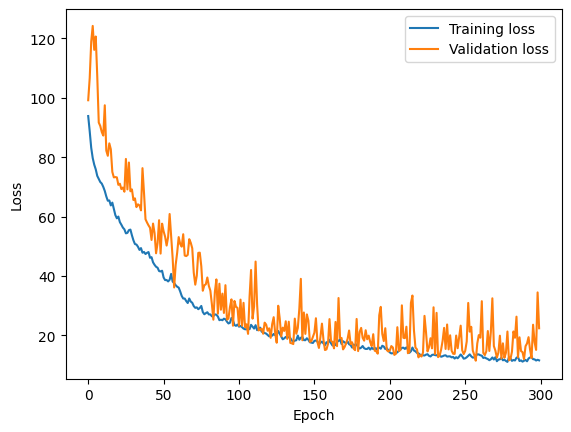

In [38]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
t_l.extend(train_loss) # combining two lists
v_l.extend(val_loss)
plt.plot(t_l, label='Training loss')
plt.plot(v_l, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


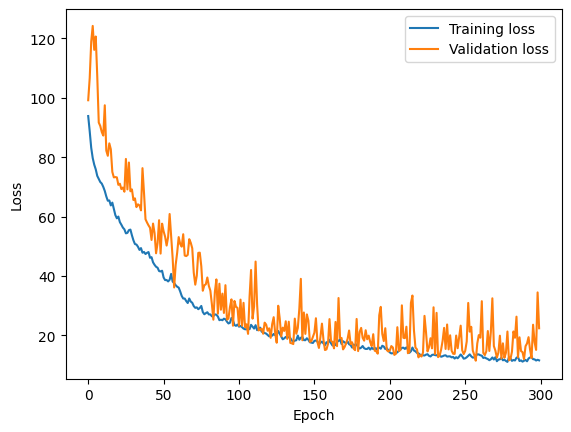

In [39]:
plt.plot(t_l, label='Training loss')
plt.plot(v_l, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('withDropOut.png')

In [303]:
y_pred = model.predict(X_test)

2023-04-16 12:04:34.861283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 17ms/step


In [312]:
model.save('heston_model.h5')

In [304]:
pd.DataFrame(y_pred)

,0
0,67.691696
1,38.463688
2,143.469162
3,4.221910
4,78.216385
...,...
1995,171.611542
1996,88.209839
1997,3.423959
1998,25.721973


In [305]:
pd.DataFrame(y_test)

,call_price
650,62.234715
2041,40.619595
8668,157.760566
1114,3.910600
3902,84.255233
...,...
5022,187.209878
13,104.486133
3927,3.144596
9560,26.097666


In [306]:
mape = np.abs(y_test.values.reshape(len(y_test), 1) - y_pred)/y_test.values.reshape(len(y_test), 1)

/var/folders/jv/604w31hs1v964hc3p1jvb1c40000gn/T/ipykernel_34234/4241778797.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mape, shade=True)


<Axes: ylabel='Density'>

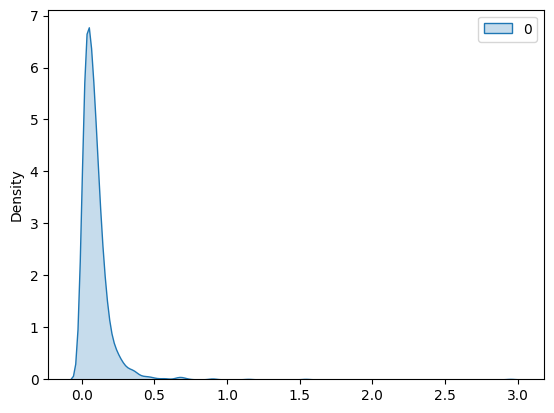

In [307]:
sns.kdeplot(mape, shade=True)
# we could see huge outliers

/var/folders/jv/604w31hs1v964hc3p1jvb1c40000gn/T/ipykernel_34234/1396845841.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mape[mape < 1], shade=True)


<Axes: ylabel='Density'>

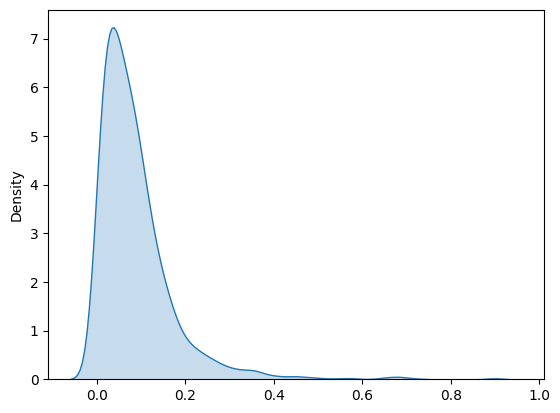

In [308]:
sns.kdeplot(mape[mape < 1], shade=True)

In [309]:
subData = X_test.copy()
subData["mape"] = mape

In [310]:
(subData).describe()

,S,K,T,r,v_0,theta,kappa,rho,xi,mape
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,256.457002,258.298689,1.589205,0.055064,0.471561,0.412250,4.941768,0.003857,0.902435,0.090583
std,142.664805,148.360080,0.840519,0.026297,0.248322,0.232362,2.892067,0.578870,0.749649,0.116981
min,10.000000,8.528634,0.083333,0.010000,0.050000,0.010000,0.000000,-0.990000,0.000000,0.000023
25%,132.500000,127.679087,0.888409,0.031818,0.256061,0.209495,2.424242,-0.510856,0.302249,0.032044
50%,258.433433,255.476395,1.582541,0.054545,0.470707,0.416970,4.848485,0.019820,0.700075,0.066407
75%,381.056056,381.151776,2.334334,0.078182,0.685354,0.616465,7.373737,0.502432,1.357865,0.113322
max,500.000000,671.148889,3.000000,0.100000,0.900000,0.800000,10.000000,0.990000,3.789454,2.951419


In [311]:
(subData[subData["mape"] > 0.5]).describe()

,S,K,T,r,v_0,theta,kappa,rho,xi,mape
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,199.242772,177.787733,2.034991,0.052513,0.241414,0.186494,4.034462,0.098458,0.251251,0.886949
std,126.910118,106.614640,0.942058,0.033935,0.241661,0.233262,3.492977,0.569294,0.203321,0.589331
min,10.000000,8.528634,0.083333,0.010000,0.058586,0.010000,0.101010,-0.680811,0.007874,0.514931
25%,107.117117,105.394847,1.972306,0.019091,0.075758,0.017980,0.505051,-0.429099,0.104191,0.645840
50%,169.899900,166.646265,2.494912,0.060000,0.144444,0.033939,3.333333,0.179369,0.263293,0.681132
75%,293.993994,261.662064,2.637971,0.083636,0.256061,0.385051,7.373737,0.561892,0.382871,0.895881
max,450.460460,346.738875,2.891975,0.100000,0.857071,0.576566,10.000000,0.877027,0.785551,2.951419


In [233]:
(subData[(subData["S"]/subData["K"] < 1.05) & (subData["theta"] > 0.6) & (subData["S"]/subData["K"] > 0.95)]).describe()

,S,K,T,r,v_0,theta,kappa,rho,xi,mape
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,247.601926,247.707873,1.267164,0.051920,0.503227,0.708248,4.862135,-0.001305,1.186403,0.133273
std,142.615105,142.807604,0.856491,0.024883,0.239575,0.058632,2.776423,0.561512,0.854714,0.138610
min,13.923924,13.559914,0.095012,0.010000,0.050000,0.600505,0.000000,-0.990000,0.000000,0.000524
25%,125.510511,124.727804,0.513972,0.031818,0.316162,0.656364,2.575758,-0.442973,0.472946,0.040409
50%,233.663664,234.479007,1.096430,0.050909,0.522222,0.712222,4.747475,0.018829,1.045149,0.092426
75%,371.981982,366.813434,1.950409,0.072273,0.698232,0.760101,6.868687,0.449910,1.760830,0.161427
max,499.509510,513.163825,2.985402,0.100000,0.900000,0.800000,9.898990,0.984054,3.505683,0.722847


In [227]:
subData.describe()

,S,K,T,r,v_0,theta,kappa,rho,xi,mape
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,256.457002,258.298689,1.589205,0.055064,0.471561,0.412250,4.941768,0.003857,0.902435,0.172699
std,142.664805,148.360080,0.840519,0.026297,0.248322,0.232362,2.892067,0.578870,0.749649,0.209100
min,10.000000,8.528634,0.083333,0.010000,0.050000,0.010000,0.000000,-0.990000,0.000000,0.000098
25%,132.500000,127.679087,0.888409,0.031818,0.256061,0.209495,2.424242,-0.510856,0.302249,0.067786
50%,258.433433,255.476395,1.582541,0.054545,0.470707,0.416970,4.848485,0.019820,0.700075,0.128749
75%,381.056056,381.151776,2.334334,0.078182,0.685354,0.616465,7.373737,0.502432,1.357865,0.208808
max,500.000000,671.148889,3.000000,0.100000,0.900000,0.800000,10.000000,0.990000,3.789454,3.618125


In [167]:
merged_df = pd.concat([regression, X_test.drop(columns = ["S", "K"])], axis=1)

In [168]:
merged_df = merged_df.rename(columns={merged_df.columns[0]: 'Moneyness'})

In [209]:
#perform regression analysis 
X = sm.add_constant(merged_df)
Y = np.abs(y_test.values.reshape(len(y_test), 1) - y_pred)/y_test.values.reshape(len(y_test), 1)
model = sm.OLS(Y,X)
results = model.fit()

In [210]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.63
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.88e-30
Time:                        22:24:38   Log-Likelihood:                 372.14
No. Observations:                2000   AIC:                            -726.3
Df Residuals:                    1991   BIC:                            -675.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0583      0.042     -1.393      0.1

In [211]:
X_standard = (merged_df - merged_df.mean())/merged_df.std()
X_standard = sm.add_constant(X_standard)
model2 = sm.OLS(Y, X_standard)
results2 = model2.fit()

In [212]:
reg_results = Stargazer([results, results2])

In [213]:
reg_results

In [215]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X, Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [216]:
xgb.feature_importances_

array([0.        , 0.16595185, 0.1494452 , 0.06707907, 0.15930448,
       0.2284041 , 0.12065402, 0.06959969, 0.03956161], dtype=float32)

<BarContainer object of 9 artists>

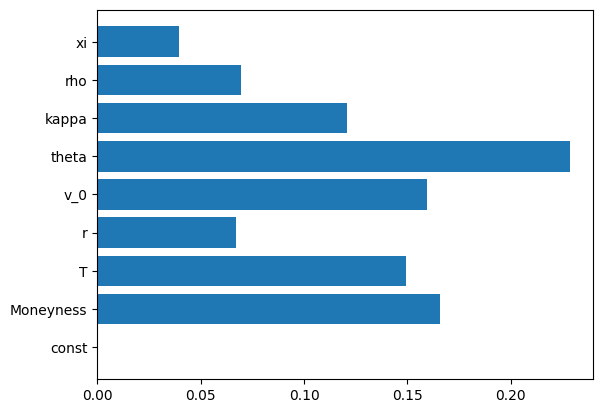

In [217]:
plt.barh(X.columns, xgb.feature_importances_)

In [112]:
# plot the error heat map 
plot_ = pd.DataFrame(X_test["S"]/X_test["K"])
plot_.columns = ["Moneyness"]
plot_["Time"] = X_test["T"]
plot_["Error"] = np.abs(y_test.values.reshape(len(y_test), 1) - y_pred)/y_test.values.reshape(len(y_test), 1)

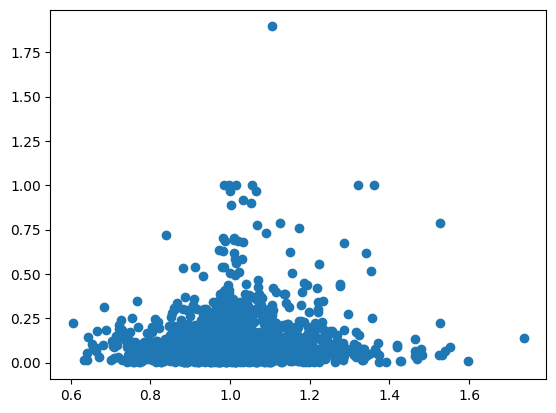

In [117]:
plt.scatter(plot_["Moneyness"], plot_["Error"])

<Axes: xlabel='Moneyness', ylabel='Time'>

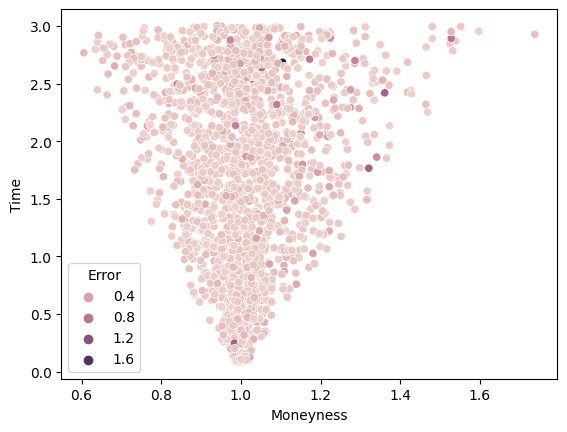

In [113]:
sns.scatterplot(x=plot_["Moneyness"], y=plot_["Time"], hue=plot_["Error"])

In [111]:
pd.DataFrame(Y.reshape(len(Y),)).describe()

,0
count,2000.000000
mean,5.860677
std,6.877477
min,0.005325
25%,1.110689
50%,3.662295
75%,8.092068
max,63.055789


In [97]:
Y.reshape(len(Y),)

array([14.5756195 ,  0.79204203, 18.76584567, ...,  0.79575822,
        0.16445869, 11.99852465])

In [86]:
Y.reshape(len(Y), )

array([14.5756195 ,  0.79204203, 18.76584567, ...,  0.79575822,
        0.16445869, 11.99852465])

In [313]:
len(data)

20000